In [ ]:
import numpy as np
import glob
import shutil
import pandas as pd
import cv2
import os

In [ ]:
# YOLOv5
!git clone https://github.com/ultralytics/yolov5
!mv yolov5/* ./
!pip install -r requirements.txt
!pip uninstall -y wandb

Cloning into 'yolov5'...
remote: Enumerating objects: 12300, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 12300 (delta 6), reused 5 (delta 2), pack-reused 12281
Receiving objects: 100% (12300/12300), 12.12 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (8482/8482), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 31.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# classes = [["A10"],["B1"],["B2"],["B52"], ["Be200"], ["C130"],["C17"],["C5"], ["E2"],["EF2000"],
#            ["F117"],["F14"],["F15"],["F16"],["F18"],["F22"],["F35"],["F4"],
#            ["JAS39"],["MQ9"],["Mig31"],["Mirage2000"],["RQ4"],["Rafale"],
#            ["SR71"],["Su57"],["Tu160"],["Tu95"],["U2"],["US2"], ["V22"],["XB70"],["YF23"],["J20"]]
# classes = np.array(classes)

In [ ]:
# classes = np.array([["A10"],["B1"],["B2"],["B52"], ["Be200"], ["C130"],["C17"],["C5"], ["E2"],["EF2000"],
#            ["F117"],["F14"],["F15"],["F16"],["F18"],["F22"],["F35"],["F4"],
#            ["JAS39"],["MQ9"],["Mig31"],["Mirage2000"],["RQ4"],["Rafale"],
#            ["SR71"],["Su57"],["Tu160"],["Tu95"],["U2"],["US2"], ["V22"],["XB70"],["YF23"],["J20"]]) 
# # classes = np.array(classes)

In [ ]:
classes = ["A10","A400M", "AG600","B1","B2","B52", "Be200", "C130","C17","C5", "E2","EF2000",
           "F117","F14","F15","F16","F18","F22","F35","F4",
           "JAS39","MQ9","Mig31","Mirage2000","RQ4","Rafale",
           "SR71","Su57","Tu160","Tu95","U2","US2", "V22","XB70","YF23","J20"]
classes = np.array(classes)

In [ ]:
# classess = np.array(['A10', 'A400M', 'AG600', 'B1', 'B2', 'B52', 'Be200', 'C130', 'C17' ,
#                      'C5', 'E2', 'EF2000', 'F117', 'F14', 'F15', 'F16', 'F18', 'F22', 'F35',
#                      'F4', 'JAS39', 'MQ9', 'Mig31', 'Mirage2000', 'RQ4', 'Rafale', 
#                      'SR71', 'Su57', 'Tu160', 'Tu95', 'U2','US2', 'V22', 'XB70', 'YF23', 'J20'
#                      ])

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"febydahlan","key":"cf589e89c62a5ca5a61b5b85c65b5ad2"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d a2015003713/militaryaircraftdetectiondataset

100% 6.26G/6.26G [02:47<00:00, 54.0MB/s]
100% 6.26G/6.26G [02:47<00:00, 40.2MB/s]


In [ ]:
! unzip militaryaircraftdetectiondataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/9a90836057ab9a95536df623df0d1389.csv  
  inflating: dataset/9a90836057ab9a95536df623df0d1389.jpg  
  inflating: dataset/9aaa81880d1d37671d18cd9aca0c8120.csv  
  inflating: dataset/9aaa81880d1d37671d18cd9aca0c8120.jpg  
  inflating: dataset/9aabd19f8037b09cdbdf90940d404249.csv  
  inflating: dataset/9aabd19f8037b09cdbdf90940d404249.jpg  
  inflating: dataset/9aaddcc6bb1c52b07c97855a7a0aa5e0.csv  
  inflating: dataset/9aaddcc6bb1c52b07c97855a7a0aa5e0.jpg  
  inflating: dataset/9aba7d01b95e9bd71a637586d7bae1e5.csv  
  inflating: dataset/9aba7d01b95e9bd71a637586d7bae1e5.jpg  
  inflating: dataset/9adc2dc1290e117ed7e48436e7bad964.csv  
  inflating: dataset/9adc2dc1290e117ed7e48436e7bad964.jpg  
  inflating: dataset/9ae2384769ce267884da24ca46b49362.csv  
  inflating: dataset/9ae2384769ce267884da24ca46b49362.jpg  
  inflating: dataset/9ae2ea3369f2b9f769fff27d04f9dfa5.csv  
  inflating: dataset/9ae2ea3369f2b9f769fff27d04f9

In [ ]:
csv_paths = glob.glob('/content/dataset/*.csv')
jpg_paths = glob.glob('/content/dataset/*.jpg')
# csv_paths.sort()
jpg_paths.sort()
print(csv_paths[0])
print(jpg_paths[0])
print(len(csv_paths), len(jpg_paths))
print( len(jpg_paths))

/content/dataset/03911098dd43bda26a03427eaf04c11b.csv
/content/dataset/000106393cfe2343888c584e65fd2274.jpg
6178 6178
6178


In [ ]:
os.makedirs('yolov5/data/train/images', exist_ok=True)
os.makedirs('yolov5/data/train/labels', exist_ok=True)

os.makedirs('yolov5/data/valid/images', exist_ok=True)
os.makedirs('yolov5/data/valid/labels', exist_ok=True)

os.makedirs('yolov5/data/test/images', exist_ok=True)
os.makedirs('yolov5/data/test/labels', exist_ok=True)

In [ ]:
n_images = len(csv_paths)
n_split = n_images//20

# shutil.copy('../input/yoloconfig/best0/best0.pt', 'yolov5/model/train/last.pt')
for i, (csv_path, jpg_path) in enumerate(zip(csv_paths, jpg_paths)):
    # 标定框数量
    annotations = np.array(pd.read_csv(csv_path))
    # 1份测试，4份验证，15份训练
    if i < n_split:
        shutil.copy(jpg_path, 'yolov5/data/test/images/' + os.path.basename(jpg_path))
        txt_file_path = 'yolov5/data/test/labels/' + os.path.basename(csv_path)[:-4]+'.txt'
    elif n_split <= i < n_split*5:
        shutil.copy(jpg_path, 'yolov5/data/valid/images/' + os.path.basename(jpg_path))
        txt_file_path = 'yolov5/data/valid/labels/' + os.path.basename(csv_path)[:-4]+'.txt'
    else:
        shutil.copy(jpg_path, 'yolov5/data/train/images/' + os.path.basename(jpg_path))
        txt_file_path = 'yolov5/data/train/labels/' + os.path.basename(csv_path)[:-4]+'.txt'
    
    
    
    with open(txt_file_path, mode='w') as f:
        for annotation in annotations:
            width = annotation[1]
            height = annotation[2]
            class_name = annotation[3]
            xmin = annotation[4]
            ymin = annotation[5]
            xmax = annotation[6]
            ymax = annotation[7]
            x_center = 0.5*(xmin+xmax)
            y_center = 0.5*(ymin+ymax)
            b_width = xmax - xmin
            b_height= ymax - ymin
            class_num = np.where(classes==class_name)
            try:
                class_num = class_num[0][0]
            except:
                # print(class_name)
                continue
            output_string = '{} {} {} {} {}\n'.format(class_num,
                                                    x_center/width,
                                                    y_center/height,
                                                    b_width/width,
                                                    b_height/height)
            f.write(output_string)
print(len(glob.glob('yolov5/data/test/labels/*.txt')))
print(len(glob.glob('yolov5/data/valid/labels/*.txt')))
print(len(glob.glob('yolov5/data/train/labels/*.txt')))

308
1232
4638


In [ ]:
import yaml

dict_file = {'train':'./yolov5/data/train/images' ,
             'test' : './yolov5/data/test/images',
             'val' : './yolov5/data/valid/images',
            'nc' : '36',
            'names' : ["A10","A400M", "AG600","B1","B2","B52", "Be200", "C130","C17","C5", "E2","EF2000",
           "F117","F14","F15","F16","F18","F22","F35","F4",
           "JAS39","MQ9","Mig31","Mirage2000","RQ4","Rafale",
           "SR71","Su57","Tu160","Tu95","U2","US2", "V22","XB70","YF23","J20"]}

with open('./yolov5/data/militaryaircraft.yaml', 'w+') as file:
    documents = yaml.dump(dict_file, file)

In [ ]:
!ls

annotated	 export.py			       README.md	 utils
CONTRIBUTING.md  hubconf.py			       requirements.txt  val.py
crop		 kaggle.json			       sample_data	 yolov5
data		 LICENSE			       setup.cfg
dataset		 militaryaircraftdetectiondataset.zip  train.py
detect.py	 models				       tutorial.ipynb


In [ ]:
# # train

!python train.py --img 416 \
                --batch 16 \
                --epochs 50 \
                --data ./yolov5/data/militaryaircraft.yaml \
                --weights .yolov5/yolov5s.pt \
                --cache


train: weights=.yolov5/yolov5s.pt, cfg=, data=./yolov5/data/militaryaircraft.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-6-27 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.

In [ ]:
# detect by pretrained weights
'''
!python detect.py --weights .yolov5/yolov5s.pt \
                  --img 1024 \
                  --conf 0.2 \
                  --iou-thres 0.4 \
                  --agnostic-nms \
                  --augment \
                  --source ./yolov5/data/valid/images \
                  --name inference_valid
'''

!python detect.py --weights ./runs/train/exp2/weights/best.pt \
                  --img 416 \
                  --conf 0.1 \
                  --iou-thres 0.4 \
                  --agnostic-nms \
                  --augment \
                  --source ./yolov5/data/test/images \
                  --name inference_test

detect: weights=['./runs/train/exp2/weights/best.pt'], source=./yolov5/data/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=True, visualize=False, update=False, project=runs/detect, name=inference_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-6-27 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7107217 parameters, 0 gradients
image 1/308 /content/yolov5/data/test/images/000106393cfe2343888c584e65fd2274.jpg: 320x416 1 F15, Done. (0.058s)
image 2/308 /content/yolov5/data/test/images/0003f56298fa8999168d7988a2e9549d.jpg: 288x416 1 F35, Done. (0.045s)
image 3/308 /content/yolov5/data/test/images/000e7662268a1071827c5a8663e773f9.jpg: 320x416 Done. (0.035s)
image 4/308 /content/yolov5/data/

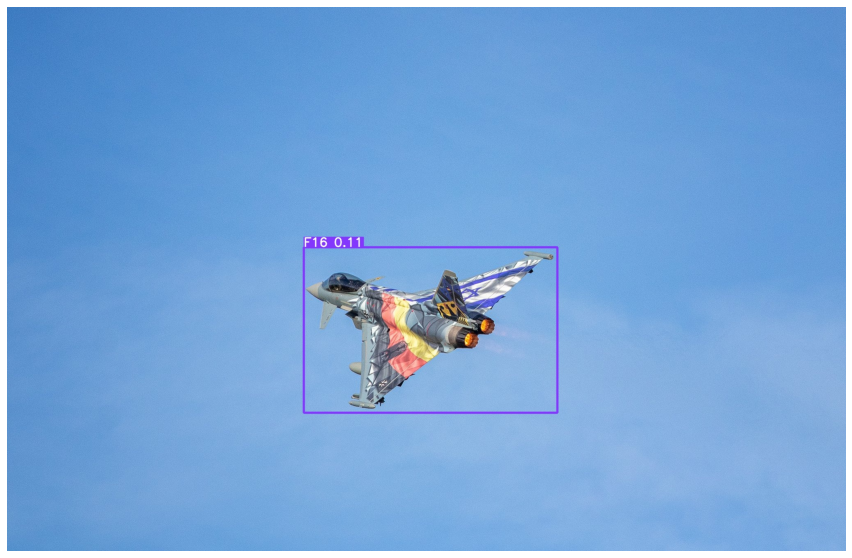

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("./runs/detect/inference_test2/0036c2784a5b8b2a4a1a4bd9109eb2f7.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!python val.py --weight ./runs/train/exp2/weights/best.pt --data ./yolov5/data/militaryaircraft.yaml --img 64

val: data=./yolov5/data/militaryaircraft.yaml, weights=['./runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=64, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2022-6-27 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7107217 parameters, 0 gradients
val: Scanning '/content/yolov5/data/valid/labels.cache' images and labels... 240 found, 991 missing, 17 empty, 1 corrupt: 100% 1232/1232 [00:00<?, ?it/s]
val: WARNING: /content/yolov5/data/valid/images/14dd66103e6399d3754f6bcb53fdead2.jpg: corrupt JPEG restored and saved
val: WARNING: /content/yolov5/data/valid/images/1e8b43deca87d25180aba67557735c01.jpg: corrupt JPEG restored and saved
val: WARNING: /content/yolov5/data/valid/images/2044a7ebe3d8132a8bce492f42bbde1d.jpg: c

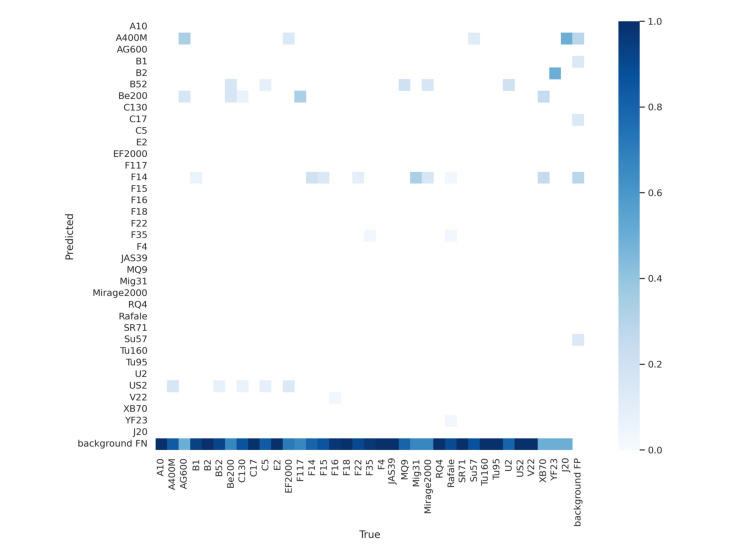

In [ ]:

image = cv2.imread('./runs/val/exp2/confusion_matrix.png')
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

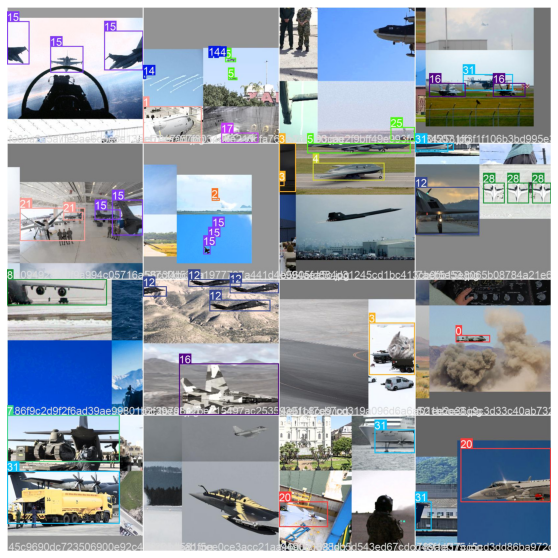

In [ ]:
image = cv2.imread('./runs/train/exp2/train_batch0.jpg')
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!rm -r ./output
!mv ./runs ./output

rm: cannot remove './output': No such file or directory
mv: cannot stat './runs': No such file or directory


In [ ]:
!rm -r ./yolov5/yolov5
!rm -r ./utils
!rm -r ./data
!rm -r ./models
!rm -r ./weights
!rm -r ./runs
!rm ./*

rm: cannot remove './yolov5/yolov5': No such file or directory
rm: cannot remove './weights': No such file or directory
rm: cannot remove './runs': No such file or directory
rm: cannot remove './annotated': Is a directory
rm: cannot remove './content': Is a directory
rm: cannot remove './crop': Is a directory
rm: cannot remove './dataset': Is a directory
rm: cannot remove './__pycache__': Is a directory
rm: cannot remove './sample_data': Is a directory
rm: cannot remove './yolov5': Is a directory


In [ ]:
!rm -r ./runs
!rm -r ./militaryaircraft.yaml

rm: cannot remove './runs': No such file or directory
rm: cannot remove './militaryaircraft.yaml': No such file or directory


In [ ]:
!rm -r ./yolov5
!rm -r ./content

rm: cannot remove './yolov5': No such file or directory


In [ ]:
!rm -r ./annotated
!rm -r ./crop
!rm -r ./dataset